## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
metadata = pd.DataFrame(mouse_metadata)
study_results = pd.DataFrame(study_results)


Mouse_Data = pd.merge(metadata, study_results, on='Mouse ID', how='inner')

Mouse_Data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mouse_Data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

Text(0, 0.5, 'Number of Mouse Experiments')

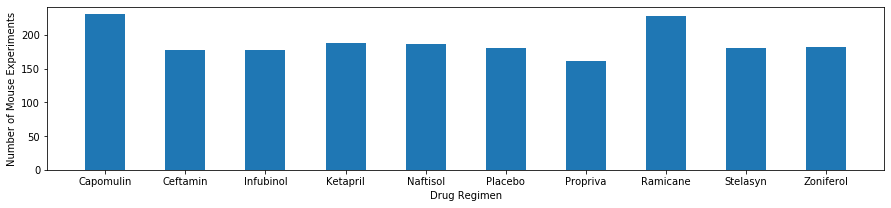

In [3]:
# Generate a bar plot showing number of data points 
#   for each treatment regimen using pandas

(drug_bin,mouse_bin_1) = np.unique(Mouse_Data["Drug Regimen"], return_counts = True);
plt.figure(figsize=(15, 3));
plt.bar(range(len(drug_bin)), mouse_bin_1, align = 'center', width = 0.5);
plt.xticks(range(len(drug_bin)),drug_bin);
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Experiments")

Text(0, 0.5, 'Number of Mouse Experiments')

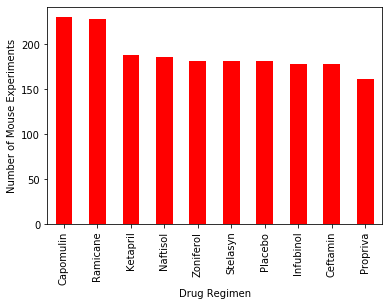

In [4]:
# Generate a bar plot showing number of data points
#   for each treatment regimen using pyplot
Mouse_Data["Drug Regimen"].value_counts().plot(kind='bar',color='red');
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Experiments")

## Pie plots

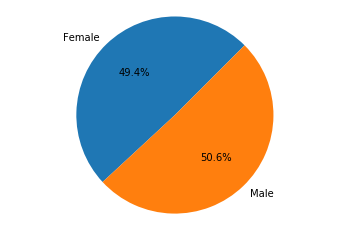

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
(sex_bin,mouse_bin_2) = np.unique(Mouse_Data["Sex"], return_counts = True);
plt.pie(mouse_bin_2, labels = sex_bin, autopct = "%1.1f%%",startangle = 45);
plt.axis("equal");

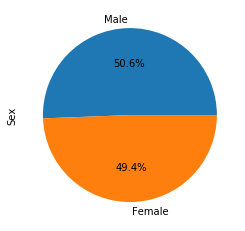

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Mouse_Data["Sex"].value_counts().plot(kind="pie", autopct = "%1.1f%%");

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_timepoint = Mouse_Data[Mouse_Data["Timepoint"]== 45]
final_tumor_volume=final_timepoint.sort_values('Tumor Volume (mm3)')
top_4 = final_tumor_volume["Drug Regimen"].unique()[:4]

Ram = final_tumor_volume[final_tumor_volume["Drug Regimen"]==top_4[0]]["Tumor Volume (mm3)"]
Cap = final_tumor_volume[final_tumor_volume["Drug Regimen"]==top_4[1]]["Tumor Volume (mm3)"]
Pro = final_tumor_volume[final_tumor_volume["Drug Regimen"]==top_4[2]]["Tumor Volume (mm3)"]
Pla = final_tumor_volume[final_tumor_volume["Drug Regimen"]==top_4[3]]["Tumor Volume (mm3)"]


In [8]:
Ram_Q = Ram.quantile([.25,.5,.75])
Ram_LQ = Ram_Q[.25]
Ram_UQ = Ram_Q[.75]
Ram_IQR = Ram_UQ - Ram_LQ
Ram_LB = Ram_LQ - (1.5*Ram_IQR)
Ram_UB = Ram_UQ + (1.5*Ram_IQR)
print(f"{top_4[0]} potential outliers: {[i for i in Ram if i < Ram_LB or i > Ram_UB]}")


Ramicane potential outliers: []


In [9]:
Pro_Q = Pro.quantile([.25,.5,.75])
Pro_LQ = Pro_Q[.25]
Pro_UQ = Pro_Q[.75]
Pro_IQR = Pro_UQ - Pro_LQ
Pro_LB = Pro_LQ - (1.5*Pro_IQR)
Pro_UB = Pro_UQ + (1.5*Pro_IQR)
print(f"{top_4[2]} potential outliers: {[i for i in Pro if i < Pro_LB or i > Pro_UB]}")


Propriva potential outliers: []


In [10]:
Pla_Q = Pla.quantile([.25,.5,.75])
Pla_LQ = Pla_Q[.25]
Pla_UQ = Pla_Q[.75]
Pla_IQR = Pla_UQ - Pla_LQ
Pla_LB = Pla_LQ - (1.5*Pla_IQR)
Pla_UB = Pla_UQ + (1.5*Pla_IQR)
print(f"{top_4[3]} potential outliers: {[i for i in Pla if i < Pla_LB or i > Pla_UB]}")


Placebo potential outliers: []


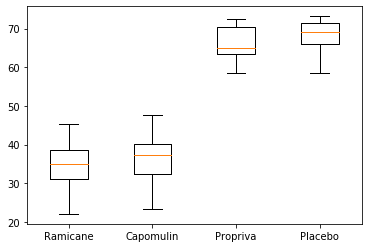

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Ram = Ram.values.tolist()
Cap = Cap.values.tolist()
Pro = Pro.values.tolist()
Pla = Pla.values.tolist()
box_plot_data = [Ram, Cap, Pro, Pla]
plt.boxplot(box_plot_data,labels = top_4);


## Line and scatter plots

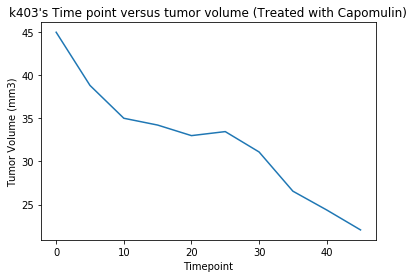

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_Data = Mouse_Data[Mouse_Data["Mouse ID"] == Mouse_Data["Mouse ID"][5]]
plt.plot(Capomulin_Data["Timepoint"],Capomulin_Data["Tumor Volume (mm3)"]);
plt.xlabel("Timepoint");
plt.ylabel("Tumor Volume (mm3)");
plt.title(str(Capomulin_Data["Mouse ID"][5]) + "'s Time point versus tumor volume (Treated with Capomulin)");
# Capomulin_Data["Timepoint"].head()
# Capomulin_Data["Tumor Volume (mm3)"].head()


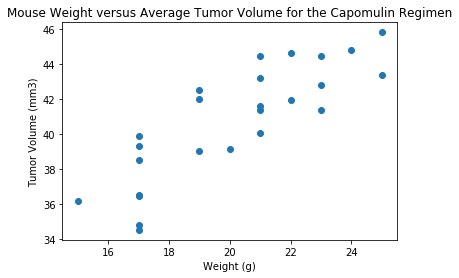

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_Data = Mouse_Data[Mouse_Data["Drug Regimen"] == "Capomulin"]
data = Capomulin_Data.groupby("Mouse ID").mean()
plt.scatter(data["Weight (g)"],data["Tumor Volume (mm3)"])
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen");
plt.xlabel("Weight (g)");
plt.ylabel("Tumor Volume (mm3)");

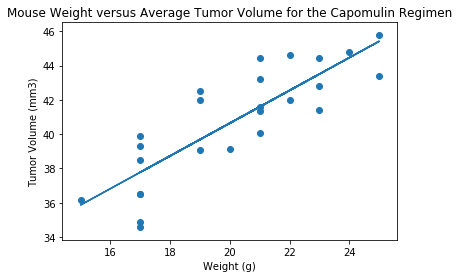

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen]
R = st.pearsonr(data["Weight (g)"],data["Tumor Volume (mm3)"])[0]
almost_y_values = st.linregress(data['Weight (g)'],data['Tumor Volume (mm3)'])
almost_y_values
y_values = data["Weight (g)"]*almost_y_values[0]+almost_y_values[1]
plt.plot(data['Weight (g)'],y_values)
plt.scatter(data["Weight (g)"],data["Tumor Volume (mm3)"])
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin Regimen");
plt.xlabel("Weight (g)");
plt.ylabel("Tumor Volume (mm3)");